# Dataset And Data

## Dataset Analysis

In [5]:
import os
import cv2
import json
import random
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt


%matplotlib inline

total number of image 3626
total number of lane 14337


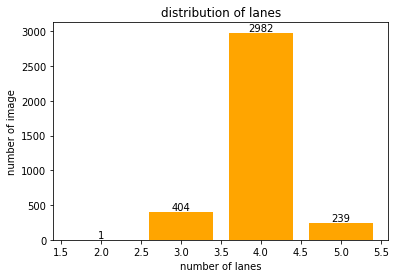

In [7]:
root_dir = "E:/data/lane_detection/Tusimple/train_set"

file_list = os.listdir(root_dir)
file_list = [item for item in file_list if item.endswith(".json")]

# 加载数据集
dataset = []
for name in file_list:
    path = os.path.join(root_dir, name)
    with open(path, encoding='utf-8') as f:
        for item in f.readlines():
            dataset.append(json.loads(item))
print("total number of image {}".format(len(dataset)))

# 有多少种情况
number_each_image = []
for item in dataset:
    number_each_image.append(len(item['lanes']))

# 每种情况的图像数量
result = {}
for item in number_each_image:
    if item not in result:
        result[item] = 1
    else:
        result[item] += 1
        

total_val = sum([i*result[i] for i in result])
print("total number of lane {}".format(total_val))

# 绘制
x = [2,3,4,5]
y = [result[i] for i in x]
graph = plt.bar(x, y, color="orange")
for b in graph:
    h = b.get_height()
    plt.text(b.get_x()+b.get_width()/2, h, '%d'%int(h),ha='center',va='bottom')
plt.title("distribution of lanes")
plt.xlabel("number of lanes")
plt.ylabel("number of image")
plt.show()

### Distribution Of Points 

In [12]:
len(dataset)

3626

In [14]:
dataset[0].keys()


dict_keys(['lanes', 'h_samples', 'raw_file'])

In [17]:
len(dataset[0]['lanes'])

4

In [19]:
dataset[0]['h_samples']

[240,
 250,
 260,
 270,
 280,
 290,
 300,
 310,
 320,
 330,
 340,
 350,
 360,
 370,
 380,
 390,
 400,
 410,
 420,
 430,
 440,
 450,
 460,
 470,
 480,
 490,
 500,
 510,
 520,
 530,
 540,
 550,
 560,
 570,
 580,
 590,
 600,
 610,
 620,
 630,
 640,
 650,
 660,
 670,
 680,
 690,
 700,
 710]

In [20]:
lane

[(672, 260),
 (690, 270),
 (712, 280),
 (734, 290),
 (757, 300),
 (779, 310),
 (801, 320),
 (824, 330),
 (846, 340),
 (869, 350),
 (891, 360),
 (913, 370),
 (936, 380),
 (958, 390),
 (981, 400),
 (1003, 410),
 (1025, 420),
 (1048, 430),
 (1070, 440),
 (1093, 450),
 (1115, 460),
 (1138, 470),
 (1160, 480),
 (1182, 490),
 (1205, 500),
 (1227, 510),
 (1250, 520),
 (1272, 530)]

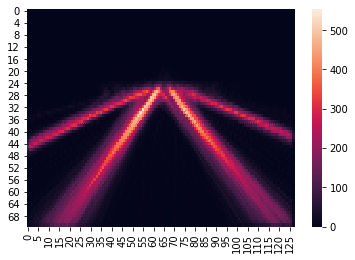

In [8]:
total_points = []
for item in dataset:
    lanes_points = [[(x, y) for (x, y) in zip(lane, item['h_samples']) if x >= 0] for lane in item["lanes"]]
    for lane in lanes_points:
        total_points.extend(lane)

point_heatmap = np.zeros((72, 128))
for point in total_points:
    point_heatmap[int(point[1]/10)][int(point[0]/10)]  += 1
    
sb.heatmap(point_heatmap)
plt.show()

### Data Augmentation

### pixel level 
* 亮度变化
* 对比度变化
* 锐化
* 颜色饱和度

In [21]:
def display_instance(image, lanes_points):
    img_vis = image.copy ()
    for lane in lanes_points:
        cv2.polylines (img_vis, np.int32 ([lane]), isClosed=False, color=(0, 255, 255), thickness=4)
    plt.imshow (img_vis[:, :, ::-1])
    plt.xticks ([])
    plt.yticks ([])
    plt.show ()

def display_augment_instance(image, aug_image, points, aug_points):
    img_vis = image.copy()
    for lane in points:
        cv2.polylines(img_vis, np.int32 ([lane]), isClosed=False, color=(0, 255, 255), thickness=4)
    aug_image_vis = aug_image.copy()
    for lane in aug_points:
        cv2.polylines(aug_image_vis, np.int32 ([lane]), isClosed=False, color=(0, 255, 255), thickness=4)
    plt.figure(figsize=(12,8))
    ax = plt.subplot(121)
    ax.imshow(img_vis[:, :, ::-1])
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title("origin image")

    ax = plt.subplot(122)
    ax.imshow (aug_image_vis[:, :, ::-1])
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title("augmentation image")
    plt.show()
    
def filter_invalid_point(points, h, w):
    aug_points = []
    for lane in points:
        temp = []
        for point in lane:
            if point[0] in range(0, w) and point[1] in range(0, h):
                temp.append(point)
        aug_points.append(temp)
    return aug_points

#### Demo of origin image

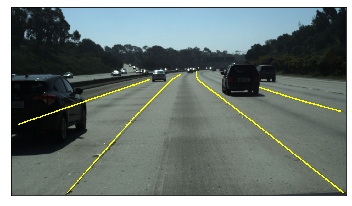

In [23]:
root_dir = "E:/data/lane_detection/Tusimple/train_set"
file_list = os.listdir(root_dir)
file_list = [item for item in file_list if item.endswith(".json")]

dataset = []
for name in file_list:
    path = os.path.join(root_dir, name)
    with open(path, encoding='utf-8') as f:
        for item in f.readlines():
            dataset.append(json.loads(item))

id_index = random.choice(dataset)

# demo one instance
image = cv2.imread(os.path.join(root_dir, id_index["raw_file"]))
lanes_points = [[(x, y) for (x, y) in zip(lane, id_index['h_samples']) if x >= 0] for lane in id_index["lanes"]]
display_instance(image, lanes_points)

### Otsu算法

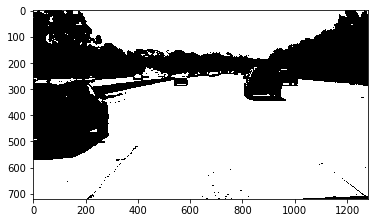

In [24]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
thres_val,bin_image = cv2.threshold(gray_image, 0, 255, cv2.THRESH_OTSU)
plt.imshow(bin_image, cmap="gray")
plt.show()

### Canny边缘检测算法

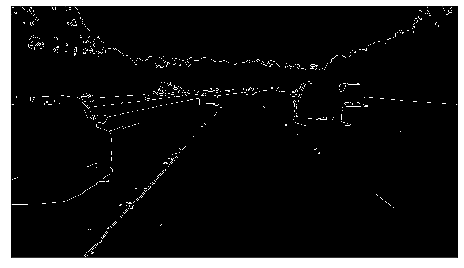

In [25]:
blur_image = cv2.GaussianBlur(gray_image, (5, 5), 0)
edge_image = cv2.Canny(blur_image, 50, 125)
plt.figure(figsize=(8,12))
plt.imshow(edge_image, cmap="gray")
plt.xticks([])
plt.yticks([])
plt.show()

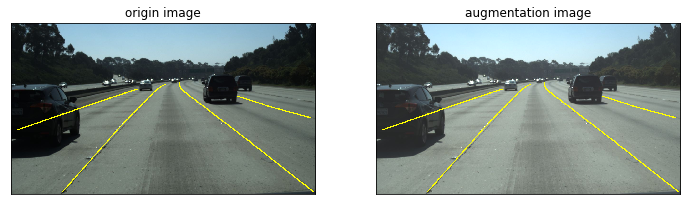

In [26]:
def adjust_light(image):
    aug_image = image.copy()
    aug_image = aug_image.astype(np.int32)
    val = np.random.randint(-40, 40)
    
    aug_image += val
    aug_image = np.maximum(np.minimum(aug_image, 255), 0)
    return aug_image

aug_image = adjust_light(image)
display_augment_instance(image, aug_image, lanes_points, lanes_points)

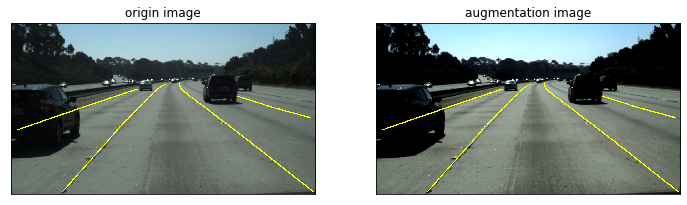

In [27]:
def adjust_contrast(image):
    aug_image = image.copy()
    aug_image = aug_image.astype(np.float32)
    mean_img = np.mean(aug_image, axis=(0,1))
    coeff = random.uniform(0.5, 3)
    aug_image = (aug_image-mean_img) * coeff
    aug_image += mean_img
    aug_image = aug_image.astype(np.int32)
    aug_image = np.maximum(np.minimum(aug_image, 255), 0)
    return aug_image

aug_image = adjust_contrast(image)
display_augment_instance(image, aug_image, lanes_points, lanes_points)

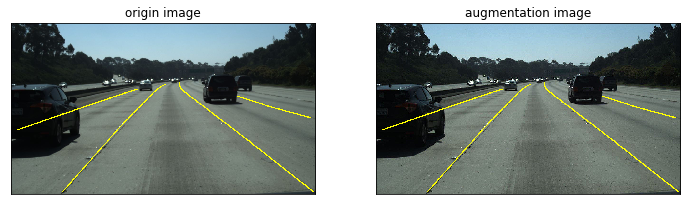

In [29]:
def sharp_image(image):
    aug_image = image.copy()
    kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]], np.float32)
    aug_image = cv2.filter2D(aug_image, -1, kernel=kernel)
    return aug_image

aug_image = sharp_image(image)
display_augment_instance(image, aug_image, lanes_points, lanes_points)

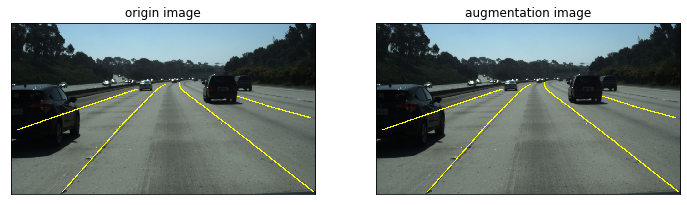

In [30]:
def adjust_saturation(image):
    aug_image = image.copy()
    aug_image = aug_image.astype(np.float32)
    hsv_image = cv2.cvtColor(aug_image,cv2.COLOR_BGR2HSV)
    hsv_image[:, :, 1] += random.uniform(-0.5, 0.5)
    hsv_image[:, :, 1] = np.clip(hsv_image[:,:,1], 0, 1)
    aug_image = cv2.cvtColor(hsv_image,cv2.COLOR_HSV2BGR)
    aug_image = aug_image.astype(np.int32)
    aug_image = np.maximum(np.minimum(aug_image, 255), 0)
    return aug_image

aug_image = adjust_saturation(image)
display_augment_instance(image, aug_image, lanes_points, lanes_points)

#### Geometric Augmentation
标签与图像同步变化．
* 水平翻转
* 随机放缩裁剪并填充
* 随机位移
* 随机旋转

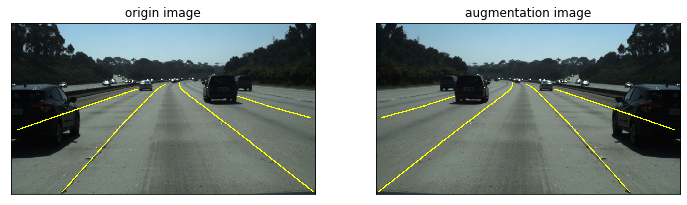

In [31]:
def horizon_flip(image, points):
    aug_image = image.copy()
    aug_points = []
    aug_image = aug_image[:, ::-1,:]
    h,w,_= aug_image.shape
    for lane in points:
        temp = []
        for point in lane:
            temp.append((w-1-point[0], point[1]))
        aug_points.append(temp)
            
    return aug_image, aug_points

aug_image, aug_point = horizon_flip(image, lanes_points)
display_augment_instance(image, aug_image, lanes_points, aug_point)

2 720 1280 816 1450


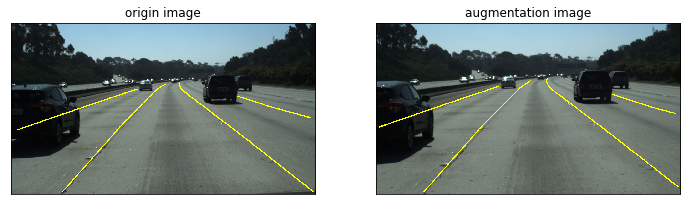

In [39]:
def random_scale_crop_pad(image, points):
    scale = random.uniform(0.7, 1.5)
    h,w,_ = image.shape
    aug_image = image.copy()
    aug_image = cv2.resize(aug_image, (int(scale*w), int(scale*h)))
    aug_points = [] 
    if(scale<1.0):
        new_h, new_w, _ = aug_image.shape
        print("1", h, w, new_h, new_w)
        pre_h_pad = int((h-new_h)/2)
        pre_w_pad = int((w-new_w)/2)
        pad_list = [[pre_h_pad, h-new_h-pre_h_pad], [pre_w_pad, w-new_w-pre_w_pad], [0, 0]]
        aug_image = np.pad(aug_image, pad_list, mode="constant")
        for lane in points:
            temp = []
            for point in lane:
                temp.append((int(point[0]*scale+pre_w_pad), int(point[1]*scale+pre_h_pad)))
            aug_points.append(temp)
        
    if(scale>1.0):
        new_h, new_w, _ = aug_image.shape
        print("2", h, w, new_h, new_w)
        pre_h_crop = int((new_h - h)/2)
        pre_w_crop = int((new_w - w)/2)
        post_h_crop = h + pre_h_crop
        post_w_crop = w + pre_w_crop
        aug_image = aug_image[pre_h_crop:post_h_crop, pre_w_crop:post_w_crop]
        for lane in points:
            temp = []
            for point in lane:
                temp.append((int(point[0]*scale-pre_w_crop), int(point[1]*scale-pre_h_crop)))
            aug_points.append(temp)
    aug_points = filter_invalid_point(aug_points,h,w)
    return aug_image, aug_points


aug_image, aug_point = random_scale_crop_pad(image, lanes_points)
display_augment_instance(image, aug_image, lanes_points, aug_point)

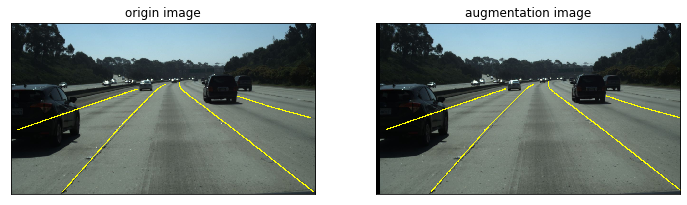

In [40]:
def random_shift(image, points):
    aug_image = image.copy()
    h,w, _= aug_image.shape
    aug_image = np.pad(aug_image, [[20,20], [20, 20], [0,0]], mode="constant")
    x = np.random.randint(0, 20*2+1)
    y = np.random.randint(0, 20*2+1)
    aug_image = aug_image[y:y+h, x:x+w]
    aug_points = []
    for lane in points:
            temp = []
            for point in lane:
                temp.append((int(point[0]+20-x), int(point[1]+20-y)))
            aug_points.append(temp)
    return aug_image, aug_points

aug_image, aug_point = random_shift(image, lanes_points)
display_augment_instance(image, aug_image, lanes_points, aug_point)

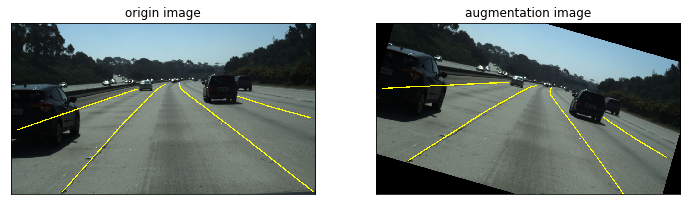

In [41]:
def random_rotate(image, points):
    aug_image = image.copy()
    h, w, _ = aug_image.shape
    c_h, c_w = int((h-1)/2), int((w-1)/2)
    random_angle = np.random.randint(-20, 20)
    M = cv2.getRotationMatrix2D((c_w, c_h), random_angle, 1)
    aug_image = cv2.warpAffine(aug_image, M, (w, h))
    angle_rad = (np.pi * random_angle) / 180.0
    c_h = h - c_h
    aug_points = []
    for lane in points:
            temp = []
            for point in lane:
                new_h = h - point[1]
                rotate_w = c_w + np.cos(angle_rad)*(point[0]-c_w)-np.sin(angle_rad)*(new_h-c_h)
                rotate_h = c_h + np.sin(angle_rad)*(point[0]-c_w)+np.cos(angle_rad)*(new_h-c_h)
                temp.append((int(rotate_w), int(h-rotate_h)))
            aug_points.append(temp)
    return aug_image, aug_points

aug_image, aug_point = random_rotate(image, lanes_points)
display_augment_instance(image, aug_image, lanes_points, aug_point)

##  More thing
* 除了上面所展示数据增强方法，还有[cutout](https://arxiv.org/abs/1708.04552)；[mixup: Beyond Empirical Risk Minimization](https://arxiv.org/abs/1710.09412)；利用GAN来做数据增强的方法[AugGAN: Cross Domain Adaptation with GAN-based Data Augmentation](http://openaccess.thecvf.com/content_ECCV_2018/papers/Sheng-Wei_Huang_AugGAN_Cross_Domain_ECCV_2018_paper.pdf)
* 一般来说，合理的数据增强会使模型性能更加；但是由于数据标注误差原因，不一定所有数据增强方法都有用．
* 目前研究发现，对于不同的任务与不同的数据集，各个数据增强方法的作用效率不一样，具体见[AutoAugment:
Learning Augmentation Strategies from Data](https://arxiv.org/pdf/1805.09501.pdf)
* 在开始尝试时，尽量使用与别人相同的预处理和数据增强方法，例如在lane detection中一般使用随机翻转，随机旋转，随机裁剪的数据增强方法．

### Albumentations

In [42]:
import albumentations as albu

ModuleNotFoundError: No module named 'albumentations'

In [ ]:
points = []
for item in lanes_points:
    points.extend(item)

In [ ]:
def vis_points(image, points, diameter=15):
    im = image.copy()

    for (x, y) in points:
        cv2.circle(im, (int(x), int(y)), diameter, (0, 255, 0), -1)

    plt.imshow(im)
    plt.show()
    

def create_transformer(transformations):
    return albu.Compose(transformations, p=1, 
                        keypoint_params=albu.KeypointParams(format='xy'))(image=image, keypoints=points)

In [ ]:
transformed = create_transformer([albu.HorizontalFlip(p=1)])

keypoints = transformed['keypoints']
im = transformed['image']
vis_points(im, keypoints)

In [ ]:
transformed = create_transformer([albu.RandomCrop(width=512, height=512, p=1)])

keypoints = transformed['keypoints']
im = transformed['image']
vis_points(im, keypoints)

In [ ]:
transformed = create_transformer([albu.Rotate(p=1)])

keypoints = transformed['keypoints']
im = transformed['image']
vis_points(im, keypoints)

In [ ]:
transformed = create_transformer([albu.CenterCrop(height=512, width=512, p=1)])

keypoints = transformed['keypoints']
im = transformed['image']
vis_points(im, keypoints)

In [ ]:
transformed = create_transformer([albu.ShiftScaleRotate(p=1)])

keypoints = transformed['keypoints']
im = transformed['image']

vis_points(im, keypoints)

In [ ]:
transformed = create_transformer([albu.RandomSizedCrop(min_max_height=(256, 1025), height=512, width=512, p=0.5),
                            albu.HorizontalFlip(p=0.5),
                            albu.OneOf([albu.HueSaturationValue(p=0.5), 
                                        albu.RGBShift(p=0.7)], p=1),                          
                            albu.RandomBrightnessContrast(p=0.5)])

keypoints = transformed['keypoints']
im = transformed['image']


vis_points(im, keypoints)

### Exhibition

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import math


def grayscale(img):
    return cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
 
def canny(img,low_threshold,high_threshold):
    return cv2.Canny(img,low_threshold,high_threshold) 

def gaussian_blur(img,kernel_size):
    return cv2.GaussianBlur(img,(kernel_size,kernel_size),0)
 
def region_of_interest(img,vertices):
    #define a blank mask to start with
    mask = np.zeros_like(img) 
    #defining a 3 channel or 1 channel color to fill the mask with depending on the input image
    if len(img.shape)>2:
        channel_count = img.shape[2]
        ignore_mask_color = (255,channel_count)
    else: 
        ignore_mask_color = 255#涂黑 
    cv2.fillPoly(mask,vertices,ignore_mask_color)
    masked_image = cv2.bitwise_and(img,mask)#与操作
    return masked_image 

def draw_lines(img,lines,color=[255,0,0],thickness=2):
    #print(lines)
    for line in lines:
        for x1,y1,x2,y2 in line:
            cv2.line(img,(x1,y1),(x2,y2),color,thickness) 

def hpass_angle_filter(lines,angle_threshold):
    if lines.shape!=None:
        filtered_lines =[]
        for line in lines:
            for x1,y1,x2,y2 in line:
                angle = abs(np.arctan((y2-y1)/(x2-x1))*180/np.pi)
                if angle > angle_threshold:
                    filtered_lines.append([[x1,y1,x2,y2]])
        return filtered_lines

def average_lines(img,lines,y_min,y_max):
    #return coordinates of the averaged lines
    hough_pts = {'m_left':[],'b_left':[],'norm_left':[],'m_right':[],'b_right':[],'norm_right':[]}
    if lines != None:
        for line in lines:
            for x1,y1,x2,y2 in line:
                m,b = np.polyfit([x1,x2],(y1,y2),1)
                norm = ((x2-x1)^2+(y2-y1)^2)*0.5
                if m>0:#斜率right
                    hough_pts['m_right'].append(m)
                    hough_pts['b_right'].append(b)
                    hough_pts['norm_right'].append(norm)
                if m<0:
                    hough_pts['m_left'].append(m)
                    hough_pts['b_left'].append(b)
                    hough_pts['norm_left'].append(norm)
    if len(hough_pts['b_left'])!=0 or len(hough_pts['m_left'])!=0 or len(hough_pts['norm_left'])!=0:
        b_avg_left = np.mean(np.array(hough_pts['b_left']))
        m_avg_left = np.mean(np.array(hough_pts['m_left']))
        xmin_left = int((y_min-b_avg_left)/m_avg_left)
        xmax_left = int((y_max-b_avg_left)/m_avg_left)
        left_lane = [[xmin_left,y_min,xmax_left,y_max]]
    else:
        left_lane = [[0,0,0,0]]
    if len(hough_pts['b_right'])!=0 or len(hough_pts['m_right'])!=0 or len(hough_pts['norm_right'])!=0:
        b_avg_right = np.mean(np.array(hough_pts['b_right']))
        m_avg_right = np.mean(np.array(hough_pts['m_right']))
        xmin_right = int((y_min - b_avg_right)/m_avg_right)
        xmax_right = int((y_max-b_avg_right)/m_avg_right)
        right_lane = [[xmin_right,y_min,xmax_right,y_max]]
    else:
        right_lane = [[0,0,0,0]]
    return [left_lane,right_lane] 

def hough_lines(img,rho,theta,threshold,min_line_len,max_line_gap):
    lines = cv2.HoughLinesP(img,rho,theta,threshold,np.array([]),minLineLength=min_line_len,maxLineGap = max_line_gap)
    return lines 

def weighted_img(img,initial_img,a=0.8,b=1,r=0.0):
    return cv2.addWeighted(initial_img,a,img,b,r)




def show_img(ax,img,cmap,title):
    if cmap=='gray':
        ax.imshow(img,cmap='gray')
    else:
        ax.imshow(img)
    ax.axis('off')
    ax.set_title(title)

def pipeline(img,vertices,threshold_angle,hline_show):
    
   # convert to grayscale
    gray = grayscale(img)
    
    # Apply Gaussian Blur:noise smooth noise
    gray_blur = gaussian_blur(gray,5)
    
    # Apply canny edge detector
    edges = canny(gray_blur,10,120)#阈值选取
    
    # apply mask 
    imshape = img.shape
    masked = region_of_interest(edges,vertices)
    h_lines = hough_lines(masked,rho=1,theta=np.pi/180,threshold=25,min_line_len=10,max_line_gap=10)#检测直线
    
    #Hough Tramsform lines
    if hline_show['hlines']=='on':
        hlines_img = np.zeros(imshape,dtype=np.uint8)
        draw_lines(hlines_img,h_lines,color=[255,0,0],thickness=2)
    else:
        hlines_img = np.zeros(imshape,dtype=np.uint8)
        
    #Angle High Pass filter
    h_lines = hpass_angle_filter(h_lines,threshold_angle)
    
    # average lines
    if hline_show['avg']=='on':
        avg_hlines = average_lines(img,h_lines,int(img.shape[0]*0.65),img.shape[0])
        avg_img = np.zeros(imshape,dtype=np.uint8)
        draw_lines(avg_img,avg_hlines,color=[255,0,0],thickness=10)
    else:
        avg_img = np.zeros(imshape,dtype=np.uint8)
        
    #Display result of each step of the pipeline
    if hline_show['steps']=='on':
        fig,ax = plt.subplots(2,3,figsize=(20,10))
        #print(ax[1])
        show_img(ax[0,0],img,None,'original_img')
        show_img(ax[0,1],gray,'gray','Apply grayscale')
        show_img(ax[0,2],gray_blur,'gray','Apply Gaussian Blur')
        show_img(ax[1,0],edges,'gray','Apply Canny')
        show_img(ax[1,1],masked,'gray','Apply mask')
        show_img(ax[1,2],hlines_img,None,'Apply Hough')
        plt.show() 

    img_all_lines = weighted_img(hlines_img,img,a=1,b=0.8,r=0.0)#计算两个矩阵的权重和
    img_all_lines = weighted_img(avg_img,img_all_lines,a=1,b=0.8,r=0.0)
    return img_all_lines




imshape = image.shape

hline_show = {'hlines':'on','avg':'off','steps':'on'}
vertices = np.array([[(100,imshape[0]),(390,imshape[0]*0.65),(620,imshape[0]*0.65),                          (imshape[1],imshape[0]),(100,imshape[0])]],dtype=np.int32)
threshold_angle = 25
lines_img = pipeline(image,vertices,threshold_angle,hline_show)
plt.imshow(lines_img)
plt.show()
